<a href="https://colab.research.google.com/github/DanielKorenDataScience/ClassificationProject/blob/main/Work_in_process/Feature_importance_diff.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

running:  RandomForestClassifier (38122, 87)

No Skill: ROC AUC=0.500
model: ROC AUC=0.920


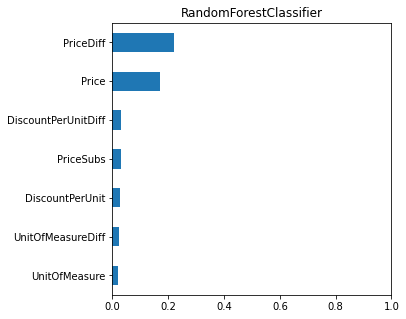

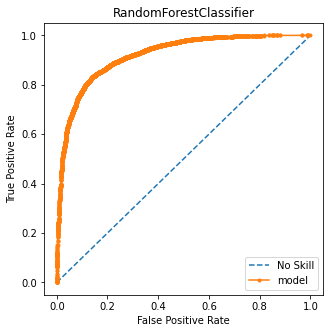

0  ...                                               note
name                          index          ...                                                   
RandomForestClassifier: Train 0      9241.0  ...  n_estimators=200, criterion='entropy', max_dep...
                              1      1546.0  ...                                                   
RandomForestClassifier: Test  0      3799.0  ...  n_estimators=200, criterion='entropy', max_dep...
                              1       877.0  ...                                                   

[4 rows x 11 columns]

no_diff


In [ ]:
ONLY_RF = True
df_result = pd.DataFrame()

if not ONLY_RF:
  process_model(LogisticRegression(max_iter=1000), X_train, y_train, X_test, y_test, note='max_iter=1000', threshold=0.0000005)  # did not fit, return accuracy=0, so we increased max_iter from default 100
  process_model(LogisticRegression(C=100, max_iter=1000, fit_intercept=False, warm_start=True), X_train, y_train, X_test, y_test, note='max_iter=1000, C=100, fit_intercept=False, warm_start=True', threshold=0.0000005, plot=False)

  clf_GB = GradientBoostingClassifier(n_estimators=100)
  process_model(clf_GB, X_train, y_train, X_test, y_test, plot=False, threshold=0.015, note='n_estimators=100')
  clf_GB = GradientBoostingClassifier(ccp_alpha=0.0001, n_estimators=200, random_state=1234)
  process_model(clf_GB, X_train, y_train, X_test, y_test, plot=False, threshold=0.015, note='ccp_alpha=0.0001, n_estimators=200, random_state=1234')

  clf_AB = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=5), n_estimators=100, learning_rate=0.01)
  process_model(clf_AB, X_train, y_train, X_test, y_test)

  process_model(KNeighborsClassifier(n_neighbors=39), X_train, y_train, X_test, y_test)

  if not REL: #ERROR: Classification metrics can't handle a mix of binary and continuous targets
    process_model(VotingClassifier(estimators=[('RF', clf_RF), ('GB', clf_GB), ('AB', clf_AB)], voting='soft'), X_train, y_train, X_test, y_test, note="('RF', clf_RF), ('GB', clf_GB), ('AB', clf_AB')")

clf_RF = RandomForestClassifier(n_estimators=200, criterion='entropy', max_depth=None, min_samples_split=20, random_state=73)#, ccp_alpha=0.0003
process_model(clf_RF, X_train, y_train, X_test, y_test, plot=True, threshold=0.015, note="n_estimators=200, criterion='entropy', max_depth=None, min_samples_split=20, random_state=73"), ccp_alpha=0.0003

d(df_result)

fname = prefix + f'_result_{id}.csv'
df_result.to_csv(fname, index = True)
p(id)